## Atividade: Bolsa Família


### Disponível também no repositório https://github.com/Jownao/dive_datascience

* Os dados são compostos por dois arquivos: 
    * A base família - (data_familia_sergipe.csv)
    * A base pessoas - (data_pessoas_sergipe.csv)  
* As bases são desidentificadas, ou seja, não possuem informações que permitam identificar quem são as pessoas. Cada base é composta por uma série de identificadores sócio-econômico das pessoas e famílias. Existe um identificador que permite associar família e pessoas.

Os atributos da base está disponível [aqui](https://github.com/Jownao/dive_datascience/blob/main/datasets/03_bolsa_familia/Dicionario_base_desidentificada_pt.xlsx) (Dicionario_base_desidentificada_pt.xlsx)



## Imports e funções adicionais

In [1]:
# Importação de pacotes necessários para este laboratório

import seaborn as sns # Biblioteca de Visualização
import matplotlib.pyplot as plt # Biblioteca de Visualização
import pandas as pd # Biblioteca Pandas manipular os dados
import numpy as np # Biblioteca para trabalhar com números

# Função para ajudar na exibição dos gráficos
def convert_sums_frame(sums_object, columns):
    frame_ = pd.DataFrame(sums_object)
    frame_.reset_index(inplace=True)
    frame_.columns = columns
    return frame_

# Função para retornar porcentagem em gráficos
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.0f}%\n({:d})".format(pct, absolute)

### Famílias

In [2]:
# Dados das famílias
dataf = pd.read_csv("../datasets/03_bolsa_familia/data_familia_sergipe.csv")
data_bolsa = dataf.query("marc_pbf == 1")


In [3]:
# Testes

#df.drop(df.loc[df['line_race']==0].index, inplace=True)
#ataf.loc[dataf['qtd_comodos_domic_fam']==20]

In [4]:
dataf.head()

,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,dat_atualizacao_familia,cod_local_domic_fam,cod_especie_domic_fam,...,cod_familia_indigena_fam,ind_familia_quilombola_fam,nom_estab_assist_saude_fam,cod_eas_fam,nom_centro_assist_fam,cod_centro_assist_fam,ind_parc_mds_fam,marc_pbf,qtde_pessoas,peso.fam
0,2806206,2,3,183415.0,2006-01-07,2018-09-30,58.0,2018-02-27,1.0,1.0,...,2.0,2.0,P S IVA SALGUEIRO,2421836.0,CRAS CENTRO DE REFERENCIA DA ASSISTENCIA SOCIAL,2.806200e+10,0.0,0,4,550052838636015
1,2803609,2,3,183416.0,2010-03-09,2018-09-30,190.0,2018-07-20,2.0,1.0,...,2.0,2.0,POSTO DE SAUDE RICARDO HAGENBECK,2421380.0,CRAS ANGELA MARIA DE CARVALHO LIMA BOMFIM,2.803602e+10,0.0,0,5,550245146328323
2,2803203,2,3,183417.0,2006-02-25,2018-09-30,100.0,2018-08-21,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550305936601879
3,2805703,2,3,183418.0,2004-05-25,2017-12-15,937.0,2017-11-09,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,0,1,550405659971983
4,2805307,1,3,183419.0,2016-03-31,2018-10-15,25.0,2018-10-15,2.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550245146328323


In [5]:
# Convertendo os atributos para categórico
dataf[['cod_local_domic_fam','cod_especie_domic_fam','cod_material_piso_fam',
'cod_material_domic_fam','cod_agua_canalizada_fam','cod_abaste_agua_domic_fam',
'cod_banheiro_domic_fam','cod_escoa_sanitario_domic_fam','cod_destino_lixo_domic_fam',
'cod_iluminacao_domic_fam','cod_calcamento_domic_fam','cod_familia_indigena_fam',
'ind_familia_quilombola_fam','ind_parc_mds_fam','estrato','classf','marc_pbf']] = dataf[['cod_local_domic_fam','cod_especie_domic_fam','cod_material_piso_fam',
'cod_material_domic_fam','cod_agua_canalizada_fam','cod_abaste_agua_domic_fam',
'cod_banheiro_domic_fam','cod_escoa_sanitario_domic_fam','cod_destino_lixo_domic_fam',
'cod_iluminacao_domic_fam','cod_calcamento_domic_fam','cod_familia_indigena_fam',
'ind_familia_quilombola_fam','ind_parc_mds_fam','estrato','classf','marc_pbf']].astype("category")

# Convertendo os atributos para objeto
dataf[['cod_centro_assist_fam','cod_eas_fam','id_familia','cd_ibge']] = dataf[['cod_centro_assist_fam','cod_eas_fam','id_familia','cd_ibge']].astype("object")



[Text(0, 0, '3'),
 Text(0, 0, '919'),
 Text(0, 0, '2063'),
 Text(0, 0, '4153'),
 Text(0, 0, '13017'),
 Text(0, 0, '42163'),
 Text(0, 0, '12248'),
 Text(0, 0, '2518'),
 Text(0, 0, '774'),
 Text(0, 0, '154'),
 Text(0, 0, '56'),
 Text(0, 0, '18'),
 Text(0, 0, '11'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '1')]

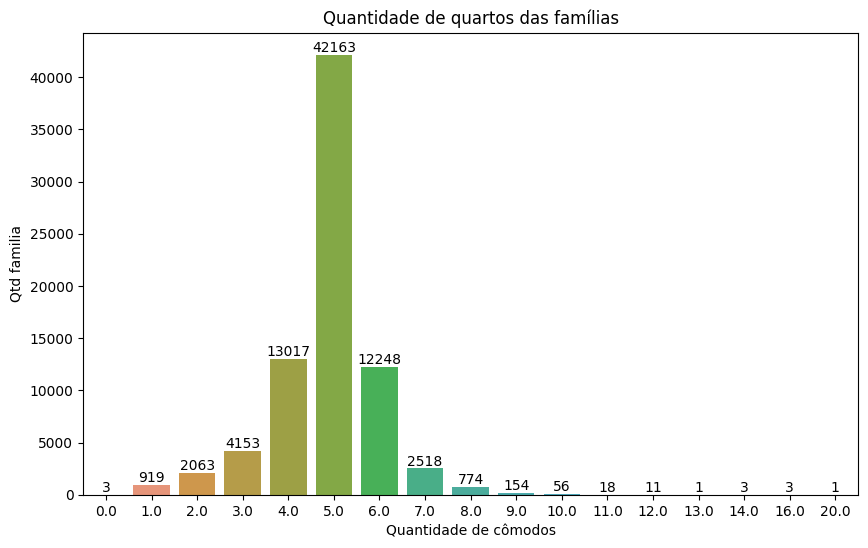

In [44]:
# Comodos x Pessoas / 

datatb = dataf.groupby("qtd_comodos_domic_fam")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['qtd_comodos_domic_fam','id_familia'])
datatb = datatb.sort_values(by='qtd_comodos_domic_fam', 
                      ascending=False )
datatb
bar = sns.barplot(data=datatb, x="qtd_comodos_domic_fam",y="id_familia")
bar.set(xlabel='Quantidade de cômodos',ylabel='Qtd familia')
plt.title('Quantidade de quartos das famílias')
plt.rcParams["figure.figsize"] = (10, 6)
bar.bar_label(bar.containers[0])

O gráfico trás as informações de quantos quartos cada família possui onde grande parte possui entre 4-6 cômodos

[Text(0, 0, '2'),
 Text(0, 0, '674'),
 Text(0, 0, '1458'),
 Text(0, 0, '2881'),
 Text(0, 0, '8734'),
 Text(0, 0, '26065'),
 Text(0, 0, '6491'),
 Text(0, 0, '1197'),
 Text(0, 0, '298'),
 Text(0, 0, '48'),
 Text(0, 0, '15'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

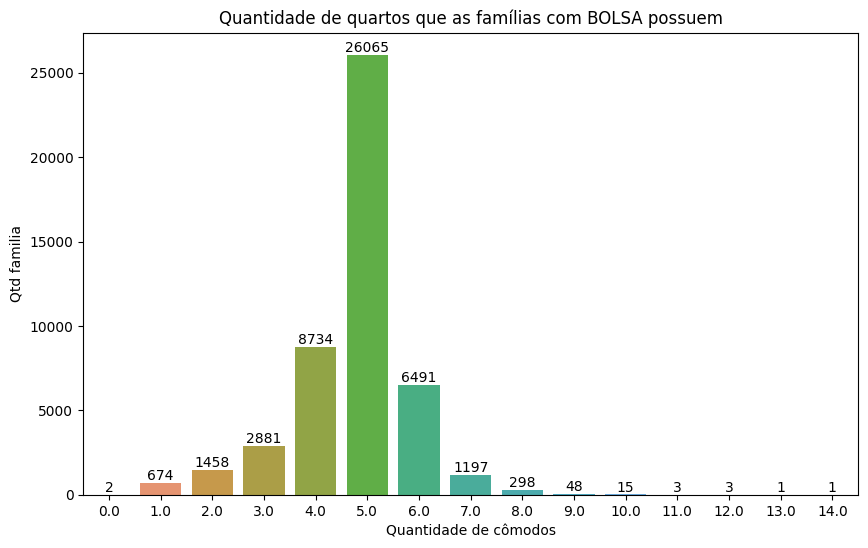

In [46]:
# Comodos x Pessoas / Grande parte possui entre 4-6 cômodos

datatb = data_bolsa.groupby("qtd_comodos_domic_fam")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['qtd_comodos_domic_fam','id_familia'])
datatb = datatb.sort_values(by='qtd_comodos_domic_fam', 
                      ascending=False )
datatb
bar = sns.barplot(data=datatb, x="qtd_comodos_domic_fam",y="id_familia")
bar.set(xlabel='Quantidade de cômodos',ylabel='Qtd familia')
plt.title('Quantidade de quartos que as famílias com BOLSA possuem')
plt.rcParams["figure.figsize"] = (10, 6)
bar.bar_label(bar.containers[0])

Aqui também porém usando os dados somente das famílias com bolsa

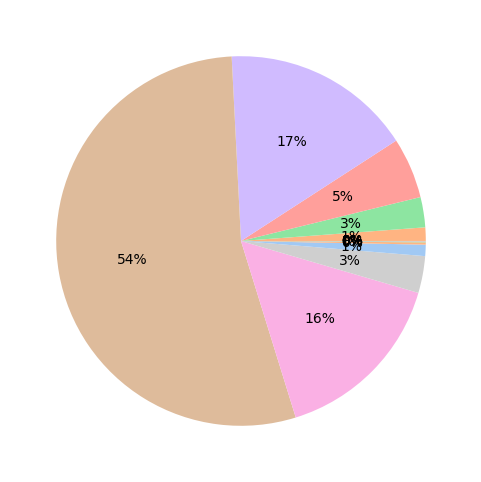

In [65]:
# Teste de gráfico pizza trazendo as mesmas informações

dataf_pie = dataf.groupby("qtd_comodos_domic_fam")["id_familia"].count()
colors = sns.color_palette('pastel')[0:8]
#Grafico de pizza para representar o gráfico acima
plt.pie(dataf_pie, colors = colors, autopct='%.0f%%')
plt.rcParams["figure.figsize"] = (20, 6)
plt.show()

[Text(0, 0, '31708'), Text(0, 0, '50567')]

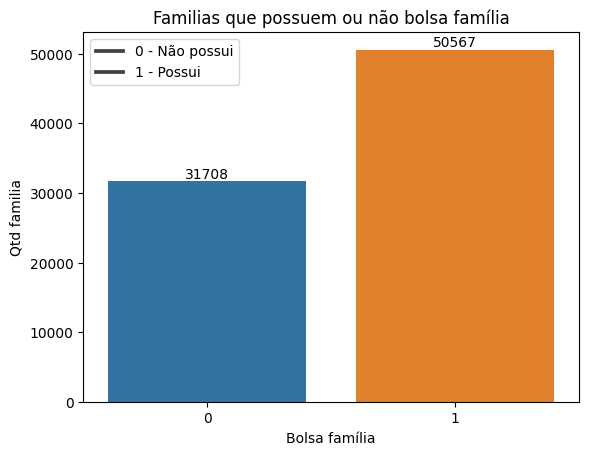

In [9]:
# Familias x Bolsa / 

datatb = dataf.groupby("marc_pbf")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['marc_pbf','id_familia'])
datatb = datatb.sort_values(by='marc_pbf', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="marc_pbf",y="id_familia")
bar.set(xlabel='Bolsa família',ylabel='Qtd familia')
plt.title('Familias que possuem ou não bolsa família')
plt.legend(('0 - Não possui','1 - Possui'))
bar.bar_label(bar.containers[0])

Temos aqui a quantidade de famílias que possuem ou não o Bolsa Família

[Text(0, 0, '7'), Text(0, 0, '23')]

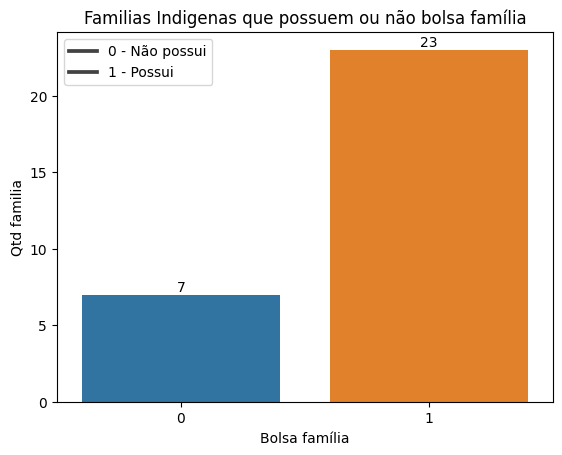

In [10]:
# Familias Indigenas x Bolsa / 
dataIB = dataf.query("cod_familia_indigena_fam == 1")

datatb = dataIB.groupby("marc_pbf")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['marc_pbf','id_familia'])
datatb = datatb.sort_values(by='marc_pbf', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="marc_pbf",y="id_familia")
bar.set(xlabel='Bolsa família',ylabel='Qtd familia')
plt.title('Familias Indigenas que possuem ou não bolsa família')
plt.legend(('0 - Não possui','1 - Possui'))
bar.bar_label(bar.containers[0])

Agora a mesma informação porém levando em consideração se a familía é índigena

[Text(0, 0, '166'), Text(0, 0, '342')]

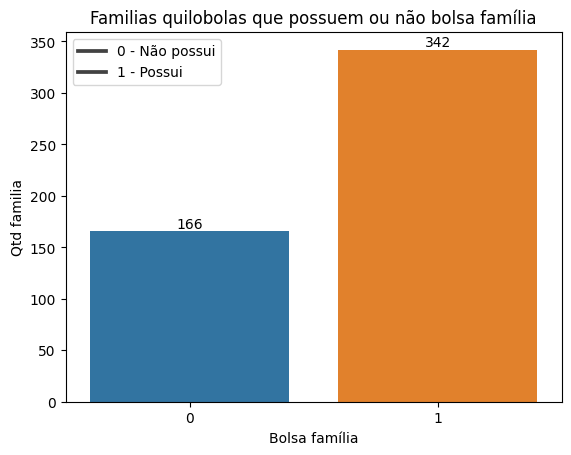

In [11]:
# Familias Quilobolas x Bolsa / 
dataQB = dataf.query("ind_familia_quilombola_fam == 1")

datatb = dataQB.groupby("marc_pbf")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['marc_pbf','id_familia'])
datatb = datatb.sort_values(by='marc_pbf', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="marc_pbf",y="id_familia")
bar.set(xlabel='Bolsa família',ylabel='Qtd familia')
plt.title('Familias quilobolas que possuem ou não bolsa família')
plt.legend(('0 - Não possui','1 - Possui'))
bar.bar_label(bar.containers[0])

E por último levando em consideração se é quilombola

[Text(0, 0, '44616'),
 Text(0, 0, '34'),
 Text(0, 0, '7'),
 Text(0, 0, '863'),
 Text(0, 0, '9'),
 Text(0, 0, '49'),
 Text(0, 0, '3189'),
 Text(0, 0, '157'),
 Text(0, 0, '24'),
 Text(0, 0, '28'),
 Text(0, 0, '9'),
 Text(0, 0, '26'),
 Text(0, 0, '404')]

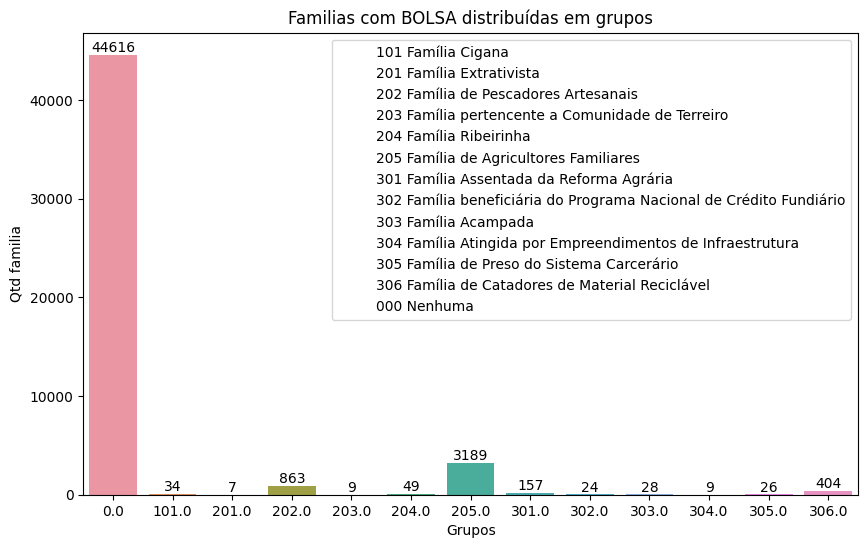

In [67]:
# Familias com bolsa x Grupos / 

datatb = data_bolsa.groupby("ind_parc_mds_fam")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['ind_parc_mds_fam','id_familia'])
datatb = datatb.sort_values(by='ind_parc_mds_fam', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="ind_parc_mds_fam",y="id_familia",errwidth=0)
bar.set(xlabel='Grupos',ylabel='Qtd familia')
plt.title('Familias com BOLSA distribuídas em grupos')
plt.legend((
'101 Família Cigana',
'201 Família Extrativista',
'202 Família de Pescadores Artesanais',
'203 Família pertencente a Comunidade de Terreiro',
'204 Família Ribeirinha',
'205 Família de Agricultores Familiares',
'301 Família Assentada da Reforma Agrária',
'302 Família beneficiária do Programa Nacional de Crédito Fundiário',
'303 Família Acampada',
'304 Família Atingida por Empreendimentos de Infraestrutura',
'305 Família de Preso do Sistema Carcerário',
'306 Família de Catadores de Material Reciclável',
'000 Nenhuma'
))
plt.rcParams["figure.figsize"] = (8, 5)
bar.bar_label(bar.containers[0])

Exibindo o gráfico de quantidade de famílias, com bolsa família, distribuídas em grupos familiares como segue na legenda

[Text(0, 0, '44107'),
 Text(0, 0, '946'),
 Text(0, 0, '1201'),
 Text(0, 0, '184'),
 Text(0, 0, '196'),
 Text(0, 0, '1255')]

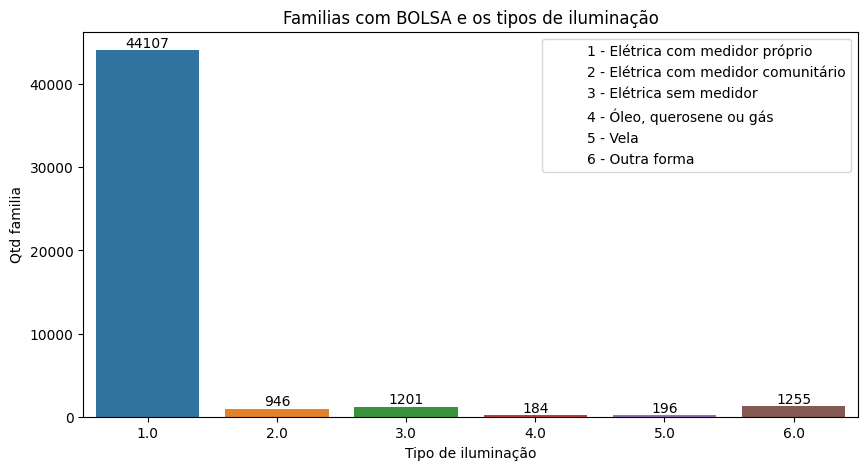

In [13]:
# Familias com bolsa x Tipo de iluminação / 

datatb = data_bolsa.groupby("cod_iluminacao_domic_fam")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_iluminacao_domic_fam','id_familia'])
datatb = datatb.sort_values(by='cod_iluminacao_domic_fam', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_iluminacao_domic_fam",y="id_familia",errwidth=0)
bar.set(xlabel='Tipo de iluminação',ylabel='Qtd familia')
plt.title('Familias com BOLSA e os tipos de iluminação')
plt.legend(('1 - Elétrica com medidor próprio',
'2 - Elétrica com medidor comunitário',
'3 - Elétrica sem medidor',
'4 - Óleo, querosene ou gás',
'5 - Vela',
'6 - Outra forma'))
bar.bar_label(bar.containers[0])



Agora temos a quantidade de famílias e os tipos de iluminação presente na residência, como exibido é possível verificar que mais de 90% possui energia elétrica com medidor próprio.

[Text(0, 0, '31618'), Text(0, 0, '18868')]

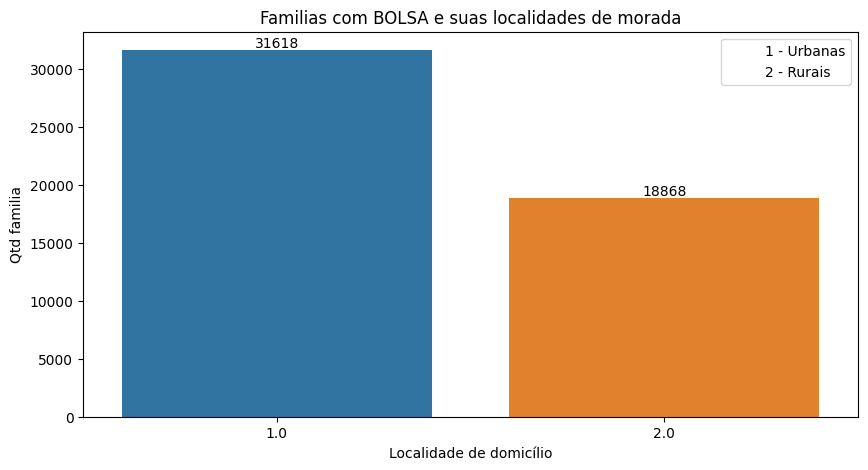

In [14]:
# Familias com bolsa x Localidade de domicílio / 

datatb = data_bolsa.groupby("cod_local_domic_fam")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_local_domic_fam','id_familia'])
datatb = datatb.sort_values(by='cod_local_domic_fam', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_local_domic_fam",y="id_familia",errwidth=0)
bar.set(xlabel='Localidade de domicílio',ylabel='Qtd familia')
plt.title('Familias com BOLSA e suas localidades de morada')
plt.legend(('1 - Urbanas','2 - Rurais'))
bar.bar_label(bar.containers[0])



A maioria das famílias vivem em área urbana porém ainda se encontra uma parcela considerável de famílias que residem em zonas rurais.

[Text(0, 0, '1393'),
 Text(0, 0, '26096'),
 Text(0, 0, '55'),
 Text(0, 0, '48'),
 Text(0, 0, '20212'),
 Text(0, 0, '15'),
 Text(0, 0, '70')]

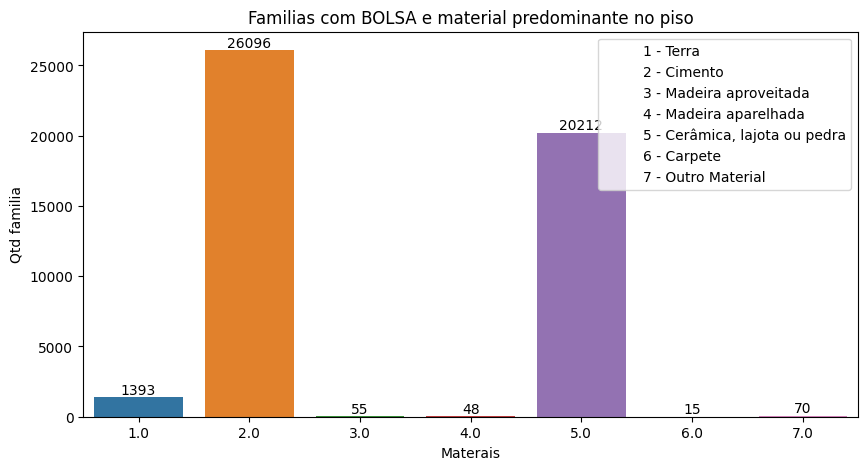

In [15]:
# Familias com bolsa x Material do piso / 

datatb = data_bolsa.groupby("cod_material_piso_fam")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_material_piso_fam','id_familia'])
datatb = datatb.sort_values(by='cod_material_piso_fam', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_material_piso_fam",y="id_familia",errwidth=0)
bar.set(xlabel='Materais',ylabel='Qtd familia')
plt.title('Familias com BOLSA e material predominante no piso')
plt.legend(('1 - Terra',
'2 - Cimento',
'3 - Madeira aproveitada',
'4 - Madeira aparelhada',
'5 - Cerâmica, lajota ou pedra',
'6 - Carpete',
'7 - Outro Material'
))
bar.bar_label(bar.containers[0])



[Text(0, 0, '37044'),
 Text(0, 0, '9382'),
 Text(0, 0, '54'),
 Text(0, 0, '542'),
 Text(0, 0, '559'),
 Text(0, 0, '87'),
 Text(0, 0, '9'),
 Text(0, 0, '212')]

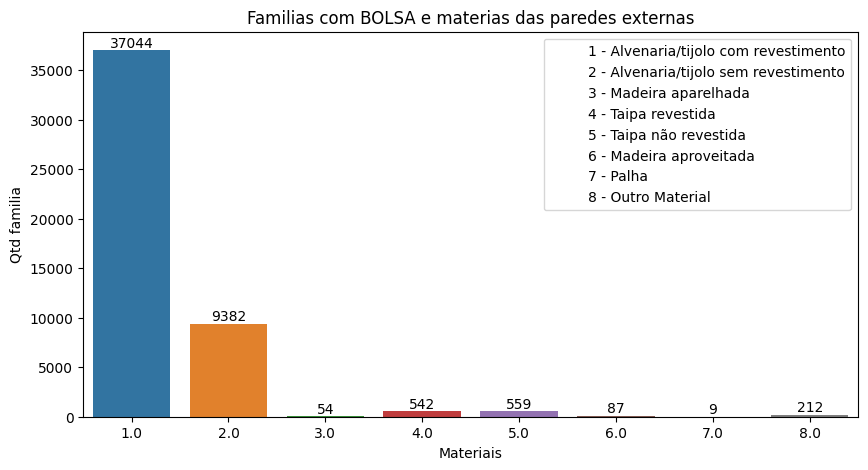

In [16]:
# Familias com bolsa x Material predominante nas paredes externas do domicílio / 

datatb = data_bolsa.groupby("cod_material_domic_fam")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_material_domic_fam','id_familia'])
datatb = datatb.sort_values(by='cod_material_domic_fam', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_material_domic_fam",y="id_familia",errwidth=0)
bar.set(xlabel='Materiais',ylabel='Qtd familia')
plt.title('Familias com BOLSA e materias das paredes externas')
plt.legend(('1 - Alvenaria/tijolo com revestimento',
'2 - Alvenaria/tijolo sem revestimento',
'3 - Madeira aparelhada',
'4 - Taipa revestida',
'5 - Taipa não revestida',
'6 - Madeira aproveitada',
'7 - Palha',
'8 - Outro Material'))
bar.bar_label(bar.containers[0])



[Text(0, 0, '45722'), Text(0, 0, '2167')]

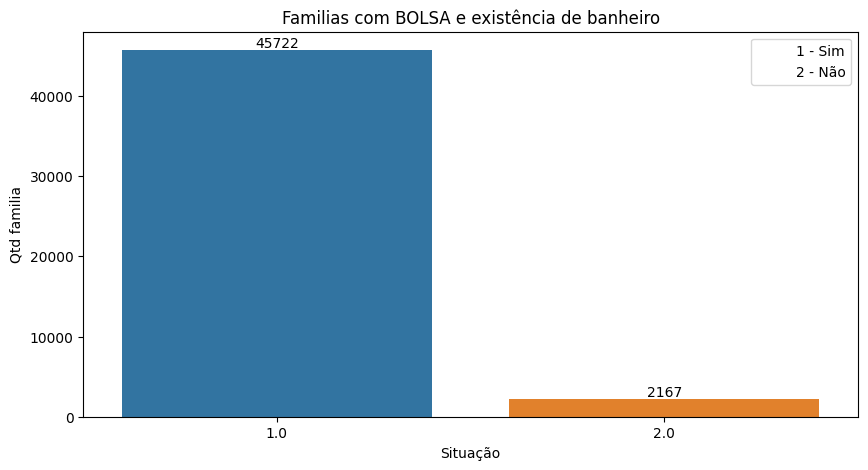

In [17]:
# Familias com bolsa x Localidade de domicílio / 

datatb = data_bolsa.groupby("cod_banheiro_domic_fam")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_banheiro_domic_fam','id_familia'])
datatb = datatb.sort_values(by='cod_banheiro_domic_fam', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_banheiro_domic_fam",y="id_familia",errwidth=0)
bar.set(xlabel='Situação',ylabel='Qtd familia')
plt.title('Familias com BOLSA e existência de banheiro')
plt.legend(('1 - Sim','2 - Não'))
bar.bar_label(bar.containers[0])



Podemos observar que grande parte das famílias também possuem banheiro em casa, restando somente uma pequena parcela que não tem o mesmo benefício.

### Pessoas
* datap - Data pesoas
* datapF - Data pessoas junto com famílias
* datapFB - Data pessoas junto com famílias com bolsa
* datapRB - Data pessoas junto com famílias Regulares na bolsa = Renda per capita menor igual R$170,00
* datapIRB - Data pessoas junto com famílias Irregulares na bolsa = Renda per capita maior R$170,00

#### Pessoas com bolsa - Geral -

In [18]:
# Dados das pessoas
datap = pd.read_csv("../datasets/03_bolsa_familia/data_pessoas_sergipe.csv")
datapF = pd.merge(dataf,datap,on ='id_familia') # Familias e pessoas 
datapFB = pd.merge(data_bolsa,datap,on ='id_familia') #Familias e pessoas com bolsa
datapRB = datapF.query("vlr_renda_media_fam <= 170")
datapIRB = datapF.query("vlr_renda_media_fam > 170")


Text(0.5, 1.0, 'Pessoas com bolsa x Renda média')

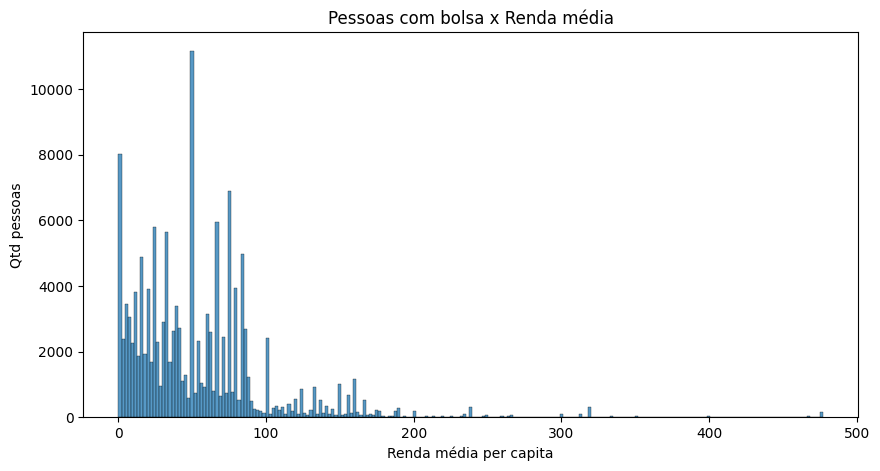

In [19]:
# Pessoas com bolsa x Renda média / 
bar = sns.histplot(datapFB['vlr_renda_media_fam'])
bar.set(xlabel='Renda média per capita',ylabel='Qtd pessoas')
plt.title('Pessoas com bolsa x Renda média')

É possível observar que possuem algumas famílias com uma renda per capita maior que o permitido pelo exigido em Lei, que é possuir renda per capita menor ou igual a 170.

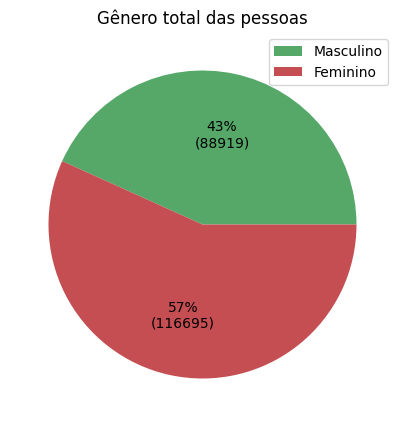

In [76]:
datap_pie = datapF.groupby("cod_sexo_pessoa")["id_familia"].count()
colors = sns.color_palette('deep')[2:8]
#Grafico de pizza para representar o gráfico acima
plt.pie(datap_pie, colors = colors, autopct=lambda pct: func(pct, datap_pie))
plt.title('Gênero total das pessoas')
#plt.legend(datap_pie)
plt.legend(('Masculino','Feminino'))
plt.show()

Aqui temos o gênero do total das pessoas sendo a maioria mulheres.

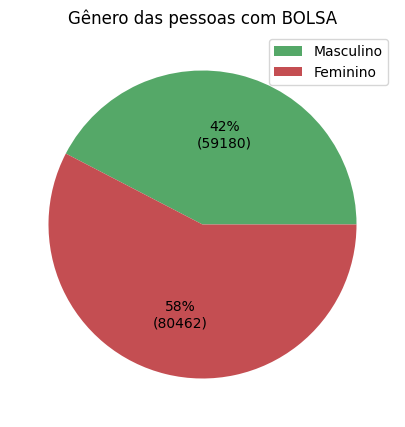

In [88]:
datap_pie = datapFB.groupby("cod_sexo_pessoa")["id_familia"].count()
colors = sns.color_palette('deep')[2:4]
#Grafico de pizza para representar o gráfico acima
plt.pie(datap_pie, colors = colors, autopct=lambda pct: func(pct, datap_pie))
plt.title('Gênero das pessoas com BOLSA')
#plt.legend(datap_pie)
plt.legend(('Masculino','Feminino'))
plt.show()

Aqui a mesma informação mas levando em conta que todas pessoas possuam o bolsa família.

[Text(0, 0, '20542'),
 Text(0, 0, '13985'),
 Text(0, 0, '373'),
 Text(0, 0, '706'),
 Text(0, 0, '572'),
 Text(0, 0, '74'),
 Text(0, 0, '456'),
 Text(0, 0, '88'),
 Text(0, 0, '3'),
 Text(0, 0, '19'),
 Text(0, 0, '60')]

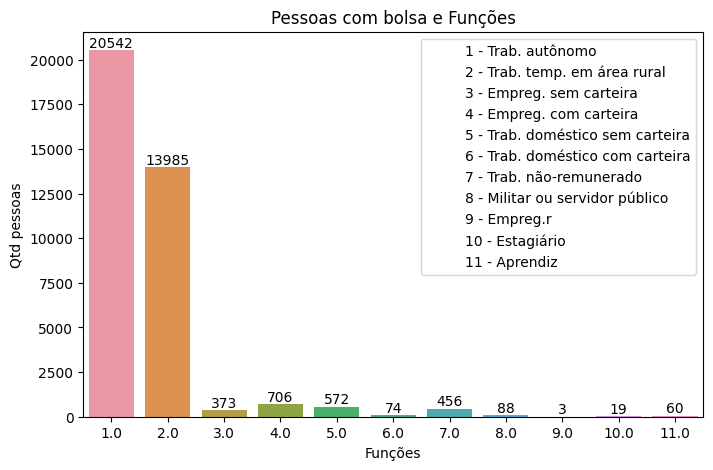

In [91]:
# Pessoas com bolsa x Função principal / 

datatb = datapFB.groupby("cod_principal_trab_memb")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_principal_trab_memb','id_familia'])
datatb = datatb.sort_values(by='cod_principal_trab_memb', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_principal_trab_memb",y="id_familia",errwidth=0)
bar.set(xlabel='Funções',ylabel='Qtd pessoas')
plt.title('Pessoas com bolsa e Funções')
plt.legend(('1 - Trab. autônomo',
'2 - Trab. temp. em área rural',
'3 - Empreg. sem carteira',
'4 - Empreg. com carteira',
'5 - Trab. doméstico sem carteira',
'6 - Trab. doméstico com carteira',
'7 - Trab. não-remunerado',
'8 - Militar ou servidor público',
'9 - Empreg.r',
'10 - Estagiário',
'11 - Aprendiz'
))
bar.bar_label(bar.containers[0])

Nesse gráfico é possivel observar que a maioria das pessoas trabalham de forma autônoma ou fazem algum bico para ter a renda familiar e também a outra grande parte possuem trabalhos temporarios em áreas rurais.

[Text(0, 0, '16183'), Text(0, 0, '19276')]

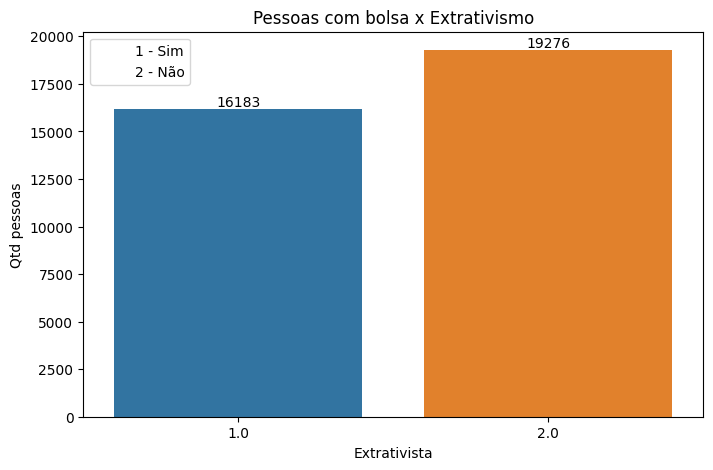

In [92]:
# Pessoas com bolsa x Extrativista / 

datatb = datapFB.groupby("cod_agricultura_trab_memb")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_agricultura_trab_memb','id_familia'])
datatb = datatb.sort_values(by='cod_agricultura_trab_memb', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_agricultura_trab_memb",y="id_familia",errwidth=0)
bar.set(xlabel='Extrativista',ylabel='Qtd pessoas')
plt.title('Pessoas com bolsa x Extrativismo')
plt.legend(('1 - Sim',
'2 - Não'
))
bar.bar_label(bar.containers[0])

[Text(0, 0, '35459'), Text(0, 0, '49344')]

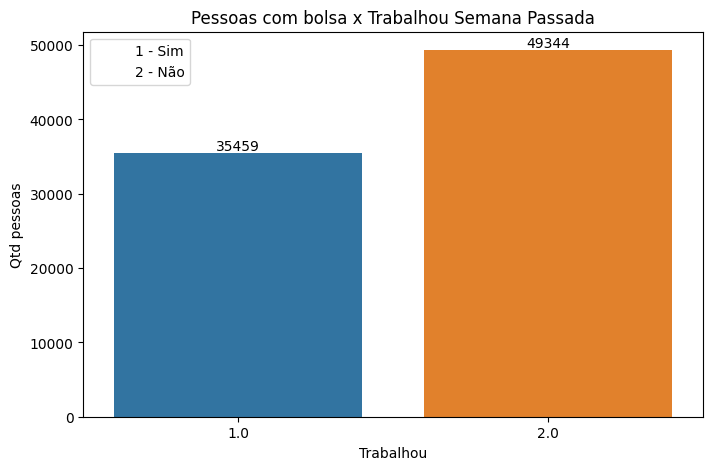

In [93]:
# Pessoas com bolsa x Trabalhou semanasa passada / 

datatb = datapFB.groupby("cod_trabalhou_memb")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_trabalhou_memb','id_familia'])
datatb = datatb.sort_values(by='cod_trabalhou_memb', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_trabalhou_memb",y="id_familia",errwidth=0)
bar.set(xlabel='Trabalhou',ylabel='Qtd pessoas')
plt.title('Pessoas com bolsa x Trabalhou Semana Passada')
plt.legend(('1 - Sim',
'2 - Não'
))
bar.bar_label(bar.containers[0])

[Text(0, 0, '22551'), Text(0, 0, '40155')]

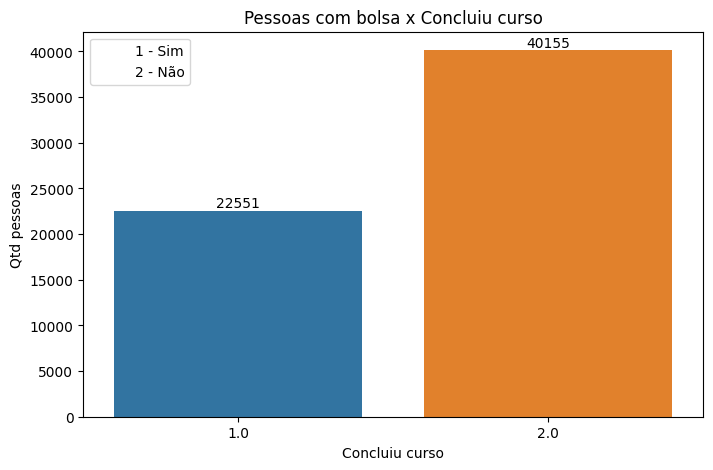

In [94]:
# Pessoas com bolsa x Concluiu curso / 

datatb = datapFB.groupby("cod_concluiu_frequentou_memb")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_concluiu_frequentou_memb','id_familia'])
datatb = datatb.sort_values(by='cod_concluiu_frequentou_memb', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_concluiu_frequentou_memb",y="id_familia",errwidth=0)
bar.set(xlabel='Concluiu curso',ylabel='Qtd pessoas')
plt.title('Pessoas com bolsa x Concluiu curso')
plt.legend(('1 - Sim',
'2 - Não'
))
bar.bar_label(bar.containers[0])

[Text(0, 0, '7526'),
 Text(0, 0, '6843'),
 Text(0, 0, '17766'),
 Text(0, 0, '8209'),
 Text(0, 0, '7736'),
 Text(0, 0, '4693'),
 Text(0, 0, '4211'),
 Text(0, 0, '4995'),
 Text(0, 0, '504'),
 Text(0, 0, '222')]

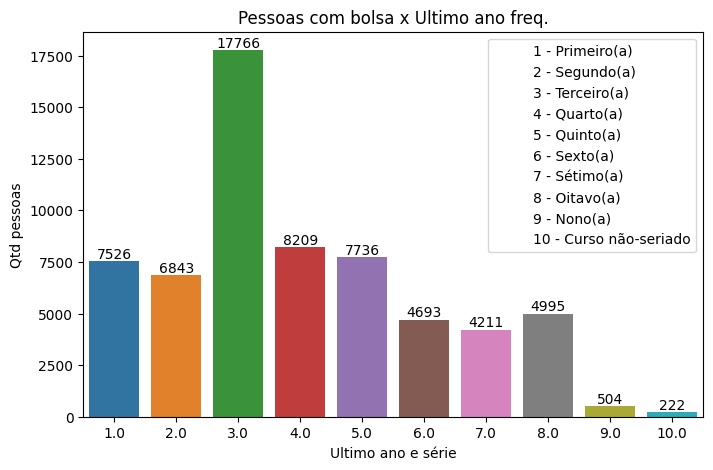

In [95]:
# Pessoas com bolsa x Ultimo ano frequentado / 

datatb = datapFB.groupby("cod_ano_serie_frequentou_memb")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_ano_serie_frequentou_memb','id_familia'])
datatb = datatb.sort_values(by='cod_ano_serie_frequentou_memb', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_ano_serie_frequentou_memb",y="id_familia",errwidth=0)
bar.set(xlabel='Ultimo ano e série',ylabel='Qtd pessoas')
plt.title('Pessoas com bolsa x Ultimo ano freq.')
plt.rcParams["figure.figsize"] = (10, 5)
plt.legend(('1 - Primeiro(a)',
'2 - Segundo(a)',
'3 - Terceiro(a)',
'4 - Quarto(a)',
'5 - Quinto(a)',
'6 - Sexto(a)',
'7 - Sétimo(a)',
'8 - Oitavo(a)',
'9 - Nono(a)',
'10 - Curso não-seriado'
))
bar.bar_label(bar.containers[0])

Nesse gráfico é possivel observar que parcela maior de famílias frequentaram até o 3 ano da escola.

[Text(0, 0, '8'),
 Text(0, 0, '32'),
 Text(0, 0, '279'),
 Text(0, 0, '19437'),
 Text(0, 0, '18377'),
 Text(0, 0, '4805'),
 Text(0, 0, '311'),
 Text(0, 0, '19100'),
 Text(0, 0, '676'),
 Text(0, 0, '238'),
 Text(0, 0, '567'),
 Text(0, 0, '355'),
 Text(0, 0, '490'),
 Text(0, 0, '93'),
 Text(0, 0, '20')]

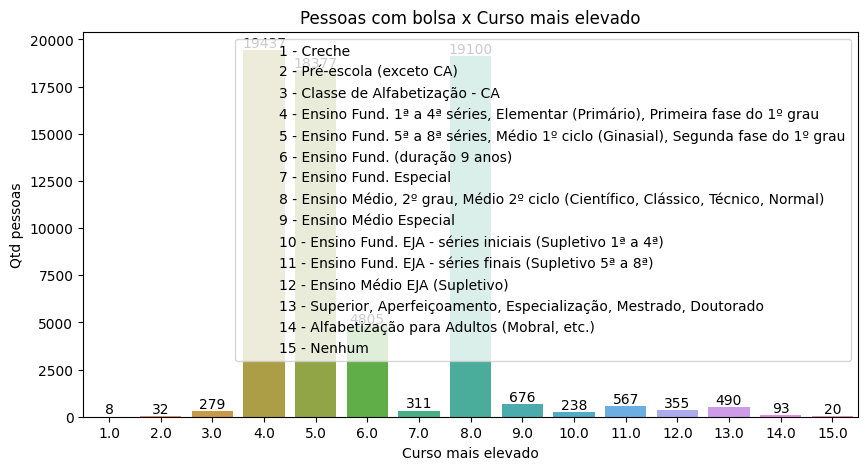

In [96]:
# Pessoas com bolsa x Curso mais elevado / 

datatb = datapFB.groupby("cod_curso_frequentou_pessoa_memb")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_curso_frequentou_pessoa_memb','id_familia'])
datatb = datatb.sort_values(by='cod_curso_frequentou_pessoa_memb', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_curso_frequentou_pessoa_memb",y="id_familia",errwidth=0)
bar.set(xlabel='Curso mais elevado',ylabel='Qtd pessoas')
plt.title('Pessoas com bolsa x Curso mais elevado')
plt.rcParams["figure.figsize"] = (18, 8)
plt.legend((
'1 - Creche',
'2 - Pré-escola (exceto CA)',
'3 - Classe de Alfabetização - CA',
'4 - Ensino Fund. 1ª a 4ª séries, Elementar (Primário), Primeira fase do 1º grau',
'5 - Ensino Fund. 5ª a 8ª séries, Médio 1º ciclo (Ginasial), Segunda fase do 1º grau',
'6 - Ensino Fund. (duração 9 anos)',
'7 - Ensino Fund. Especial',
'8 - Ensino Médio, 2º grau, Médio 2º ciclo (Científico, Clássico, Técnico, Normal)',
'9 - Ensino Médio Especial',
'10 - Ensino Fund. EJA - séries iniciais (Supletivo 1ª a 4ª)',
'11 - Ensino Fund. EJA - séries finais (Supletivo 5ª a 8ª)',
'12 - Ensino Médio EJA (Supletivo)',
'13 - Superior, Aperfeiçoamento, Especialização, Mestrado, Doutorado',
'14 - Alfabetização para Adultos (Mobral, etc.)',
'15 - Nenhum'
))
bar.bar_label(bar.containers[0])

Podemos ver que muitas pessoas se constam nos primeiros anos do fundamental, porém temos que levar em conta que muitas pessoas da base são crianças então faz sentido possuir essa quantidade, abaixo vamos fazer uma mesma pesquisa porém levando em consideração a idade da pessoa maior ou igual a 18.

[Text(0, 0, '17'),
 Text(0, 0, '265'),
 Text(0, 0, '19234'),
 Text(0, 0, '17501'),
 Text(0, 0, '3970'),
 Text(0, 0, '285'),
 Text(0, 0, '18204'),
 Text(0, 0, '600'),
 Text(0, 0, '224'),
 Text(0, 0, '488'),
 Text(0, 0, '337'),
 Text(0, 0, '472'),
 Text(0, 0, '93'),
 Text(0, 0, '16')]

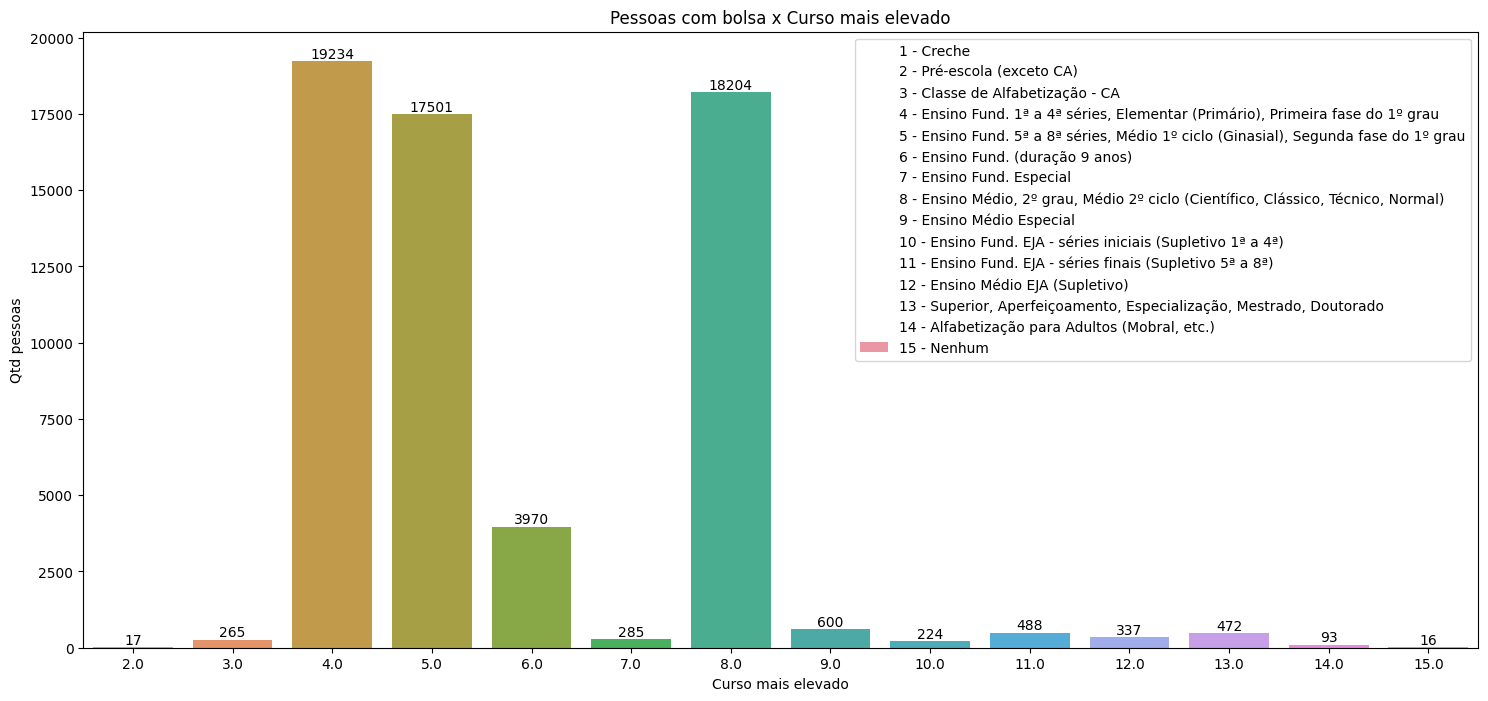

In [98]:
# Pessoas com bolsa x Curso mais elevado / 
datapFB18 =datapFB.query("idade >= 18")

datatb = datapFB18.groupby("cod_curso_frequentou_pessoa_memb")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_curso_frequentou_pessoa_memb','id_familia'])
datatb = datatb.sort_values(by='cod_curso_frequentou_pessoa_memb', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_curso_frequentou_pessoa_memb",y="id_familia",errwidth=0)
bar.set(xlabel='Curso mais elevado',ylabel='Qtd pessoas')
plt.title('Pessoas com bolsa x Curso mais elevado')
plt.rcParams["figure.figsize"] = (18, 8)
plt.legend((
'1 - Creche',
'2 - Pré-escola (exceto CA)',
'3 - Classe de Alfabetização - CA',
'4 - Ensino Fund. 1ª a 4ª séries, Elementar (Primário), Primeira fase do 1º grau',
'5 - Ensino Fund. 5ª a 8ª séries, Médio 1º ciclo (Ginasial), Segunda fase do 1º grau',
'6 - Ensino Fund. (duração 9 anos)',
'7 - Ensino Fund. Especial',
'8 - Ensino Médio, 2º grau, Médio 2º ciclo (Científico, Clássico, Técnico, Normal)',
'9 - Ensino Médio Especial',
'10 - Ensino Fund. EJA - séries iniciais (Supletivo 1ª a 4ª)',
'11 - Ensino Fund. EJA - séries finais (Supletivo 5ª a 8ª)',
'12 - Ensino Médio EJA (Supletivo)',
'13 - Superior, Aperfeiçoamento, Especialização, Mestrado, Doutorado',
'14 - Alfabetização para Adultos (Mobral, etc.)',
'15 - Nenhum'
))
bar.bar_label(bar.containers[0])

[Text(0, 0, '7630'),
 Text(0, 0, '5593'),
 Text(0, 0, '6474'),
 Text(0, 0, '4851'),
 Text(0, 0, '4453'),
 Text(0, 0, '5864'),
 Text(0, 0, '4149'),
 Text(0, 0, '3166'),
 Text(0, 0, '2153'),
 Text(0, 0, '13')]

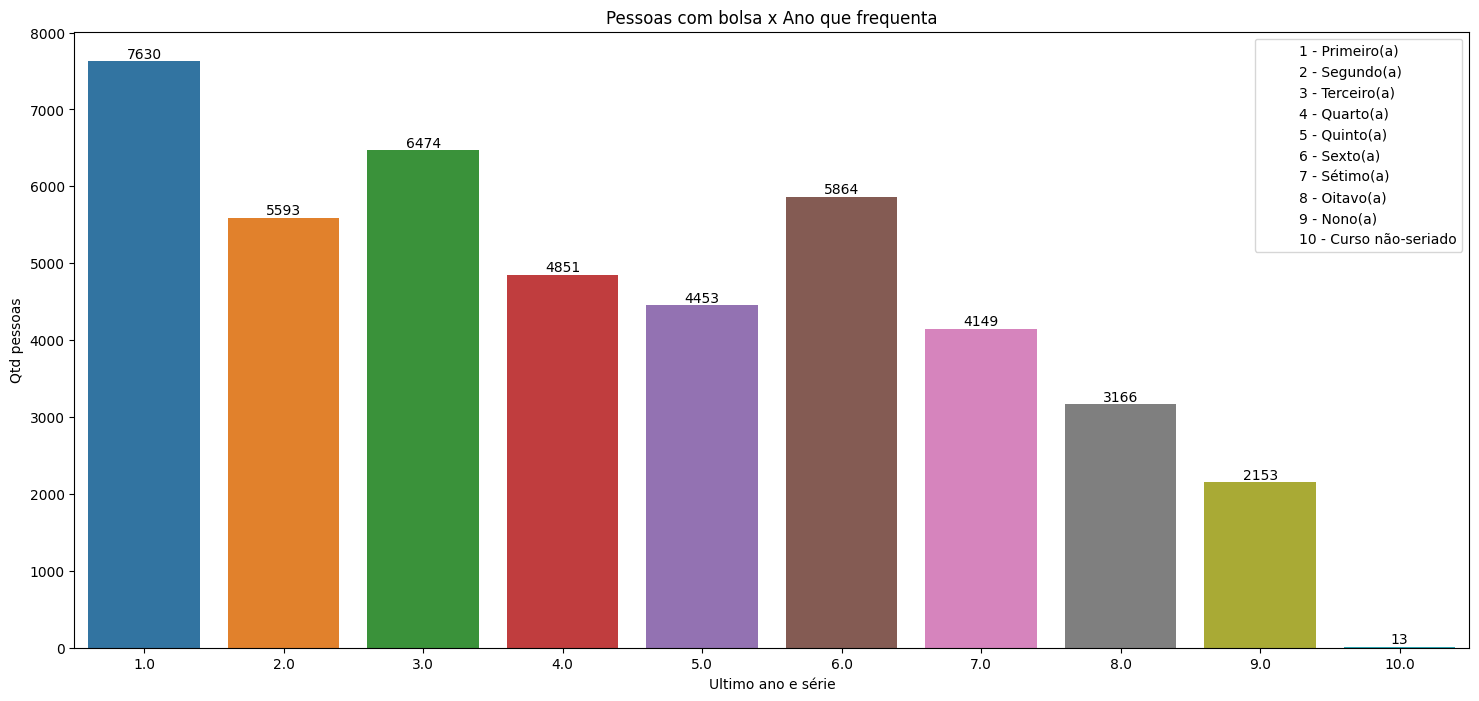

In [99]:
# Pessoas com bolsa x Ano e série que a pessoa frequenta / 

datatb = datapFB.groupby("cod_ano_serie_frequenta_memb")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_ano_serie_frequenta_memb','id_familia'])
datatb = datatb.sort_values(by='cod_ano_serie_frequenta_memb', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_ano_serie_frequenta_memb",y="id_familia",errwidth=0)
bar.set(xlabel='Ultimo ano e série',ylabel='Qtd pessoas')
plt.title('Pessoas com bolsa x Ano que frequenta')
plt.rcParams["figure.figsize"] = (10, 6)
plt.legend(('1 - Primeiro(a)',
'2 - Segundo(a)',
'3 - Terceiro(a)',
'4 - Quarto(a)',
'5 - Quinto(a)',
'6 - Sexto(a)',
'7 - Sétimo(a)',
'8 - Oitavo(a)',
'9 - Nono(a)',
'10 - Curso não-seriado'
))
bar.bar_label(bar.containers[0])

Text(0.5, 1.0, 'Pessoas com bolsa x Idade')

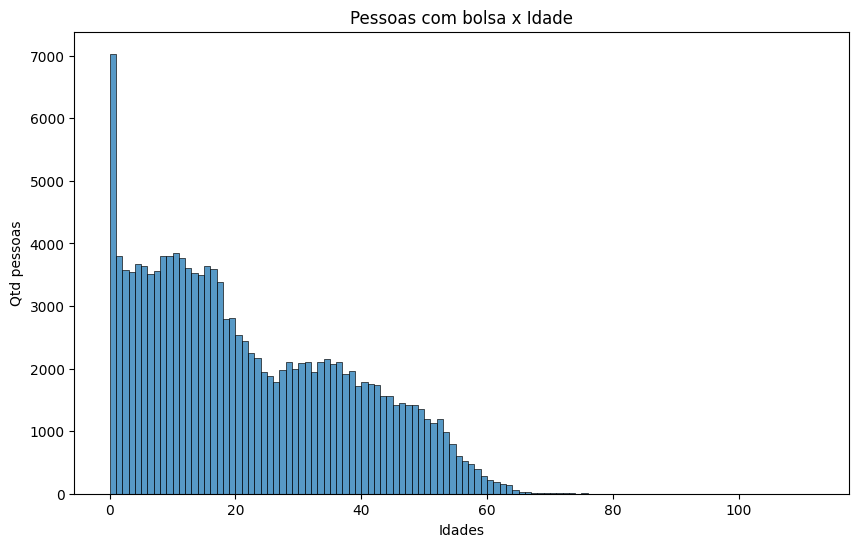

In [101]:
# Pessoas com bolsa x Idade / 
bar = sns.histplot(datapFB['idade'])
bar.set(xlabel='Idades',ylabel='Qtd pessoas')
plt.title('Pessoas com bolsa x Idade')

Como falado antes, é possível ver que muitas pessoas possuem a idade como 0 , por se tratarem de bebês recém-nascidos.

[Text(0, 0, '47597'),
 Text(0, 0, '4898'),
 Text(0, 0, '64797'),
 Text(0, 0, '22333')]

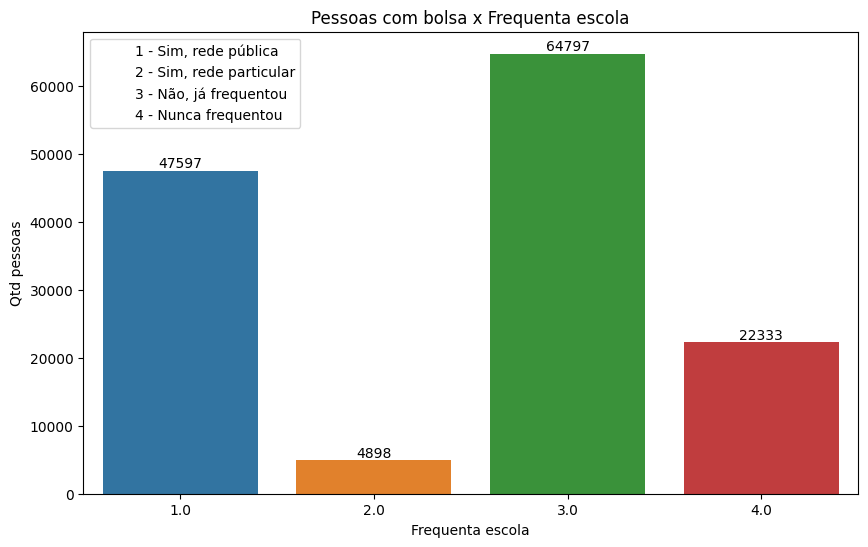

In [102]:
# Pessoas com bolsa x Frequenta escola / 

datatb = datapFB.groupby("ind_frequenta_escola_memb")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['ind_frequenta_escola_memb','id_familia'])
datatb = datatb.sort_values(by='ind_frequenta_escola_memb', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="ind_frequenta_escola_memb",y="id_familia",errwidth=0)
bar.set(xlabel='Frequenta escola',ylabel='Qtd pessoas')
plt.title('Pessoas com bolsa x Frequenta escola')
plt.legend((
'1 - Sim, rede pública',
'2 - Sim, rede particular',
'3 - Não, já frequentou',
'4 - Nunca frequentou'
))
bar.bar_label(bar.containers[0])

[Text(0, 0, '99884'), Text(0, 0, '39741')]

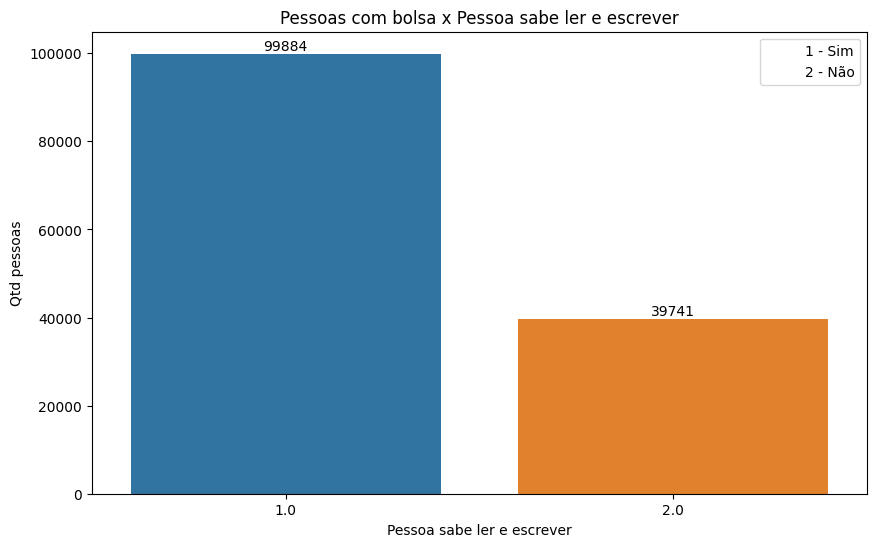

In [103]:
# Pessoas com bolsa x Pessoa sabe ler e escrever / 

datatb = datapFB.groupby("cod_sabe_ler_escrever_memb")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_sabe_ler_escrever_memb','id_familia'])
datatb = datatb.sort_values(by='cod_sabe_ler_escrever_memb', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_sabe_ler_escrever_memb",y="id_familia",errwidth=0)
bar.set(xlabel='Pessoa sabe ler e escrever',ylabel='Qtd pessoas')
plt.title('Pessoas com bolsa x Pessoa sabe ler e escrever')
plt.legend(('1 - Sim',
'2 - Não'
))
bar.bar_label(bar.containers[0])

[Text(0, 0, '17997'),
 Text(0, 0, '6214'),
 Text(0, 0, '716'),
 Text(0, 0, '114516'),
 Text(0, 0, '188')]

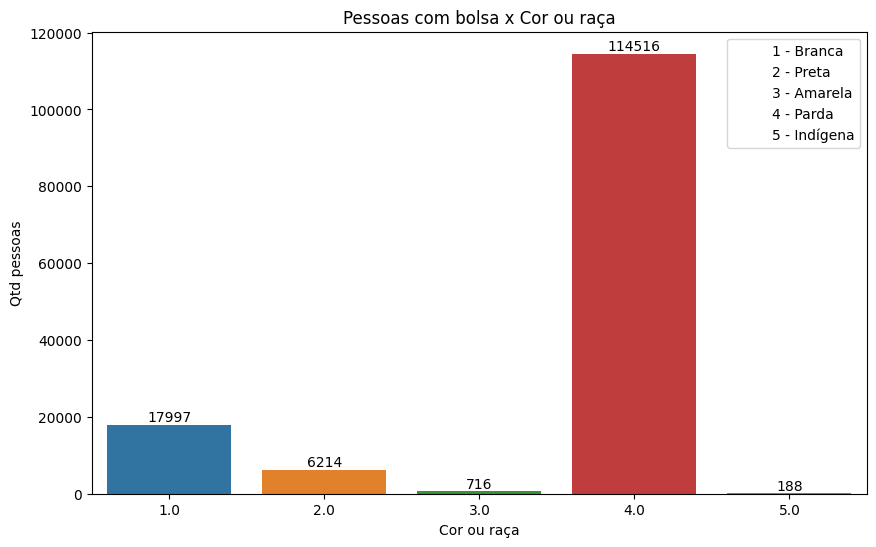

In [104]:
# Pessoas com bolsa x Cor ou raça / 

datatb = datapFB.groupby("cod_raca_cor_pessoa")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_raca_cor_pessoa','id_familia'])
datatb = datatb.sort_values(by='cod_raca_cor_pessoa', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_raca_cor_pessoa",y="id_familia",errwidth=0)
bar.set(xlabel='Cor ou raça',ylabel='Qtd pessoas')
plt.title('Pessoas com bolsa x Cor ou raça')
plt.legend((
'1 - Branca',
'2 - Preta',
'3 - Amarela',
'4 - Parda',
'5 - Indígena'
))
bar.bar_label(bar.containers[0])

[Text(0, 0, '50567'),
 Text(0, 0, '14140'),
 Text(0, 0, '69757'),
 Text(0, 0, '278'),
 Text(0, 0, '2778'),
 Text(0, 0, '292'),
 Text(0, 0, '12'),
 Text(0, 0, '797'),
 Text(0, 0, '71'),
 Text(0, 0, '877'),
 Text(0, 0, '73')]

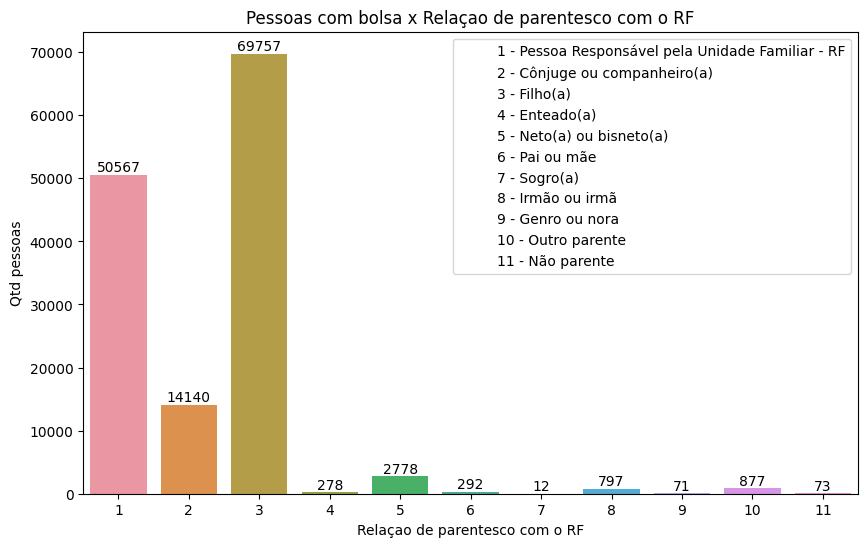

In [105]:
# Pessoas com bolsa x Relaçao de parentesco com o RF / 

datatb = datapFB.groupby("cod_parentesco_rf_pessoa")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_parentesco_rf_pessoa','id_familia'])
datatb = datatb.sort_values(by='cod_parentesco_rf_pessoa', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_parentesco_rf_pessoa",y="id_familia",errwidth=0)
bar.set(xlabel='Relaçao de parentesco com o RF',ylabel='Qtd pessoas')
plt.title('Pessoas com bolsa x Relaçao de parentesco com o RF')
plt.rcParams["figure.figsize"] = (10, 6)
plt.legend((
'1 - Pessoa Responsável pela Unidade Familiar - RF',
'2 - Cônjuge ou companheiro(a)',
'3 - Filho(a)',
'4 - Enteado(a)',
'5 - Neto(a) ou bisneto(a)',
'6 - Pai ou mãe',
'7 - Sogro(a)',
'8 - Irmão ou irmã',
'9 - Genro ou nora',
'10 - Outro parente',
'11 - Não parente'
))
bar.bar_label(bar.containers[0])

#### Pessoas Irregulares

Nos 3 gráficos a seguir podemos analisar e confirmar que diveras pessoas que possuem renda per capita maior que R$170 e recebem o benefício do bolsa família.

Tem familias até que vivem muito bem de vida e mesmo assim usufruem do benéficio, como por exemplo tem muitas famílias que possuem renda per capita de 2000 reais , mesmo levando em consideração a quantidade de pessoas na família para o cálculo , ainda é um valor alto para o exigido no bolsa família.

Text(0.5, 1.0, 'Pessoas com bolsa IRREGULAR x Renda média')

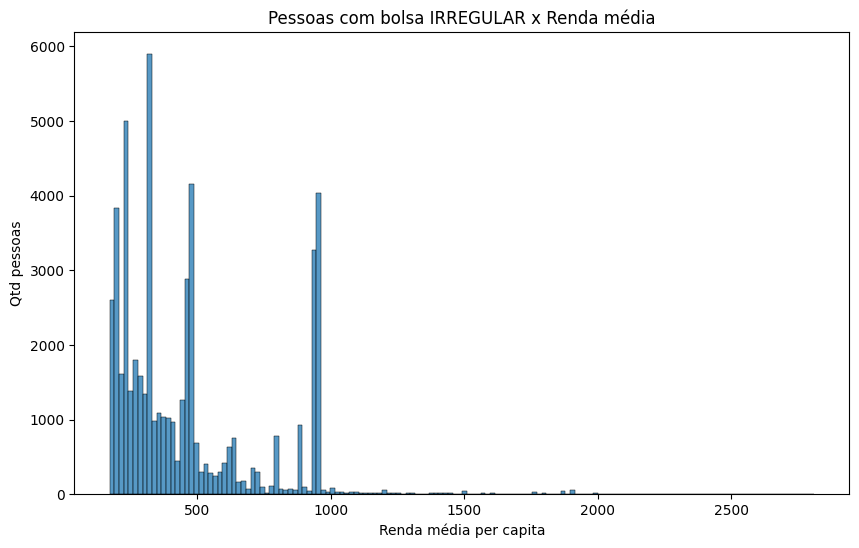

In [106]:
# Pessoas com bolsa x Renda média / 
bar = sns.histplot(datapIRB['vlr_renda_media_fam'])
bar.set(xlabel='Renda média per capita',ylabel='Qtd pessoas')
plt.title('Pessoas com bolsa IRREGULAR x Renda média')

d:\Arquivos e progamas\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Pessoas com bolsa IRREGULAR x Renda média')

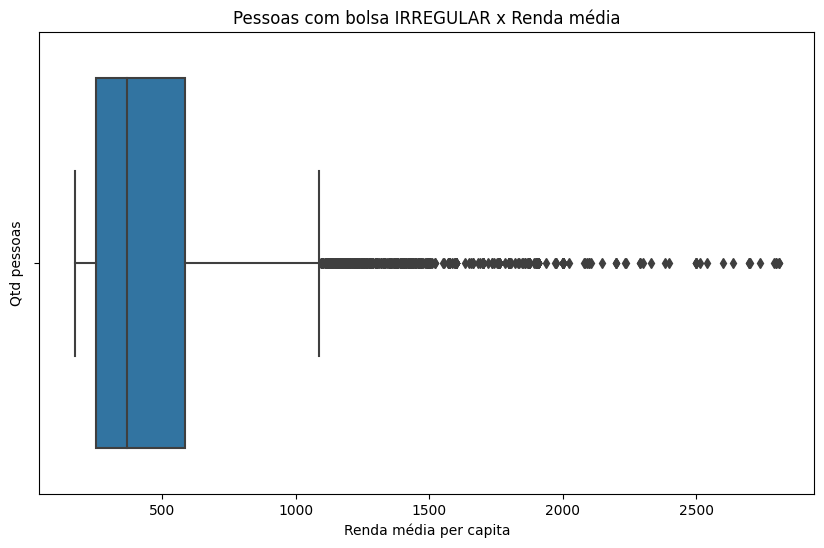

In [107]:
# Pessoas com bolsa x Renda média / 
bar = sns.boxplot(datapIRB['vlr_renda_media_fam'])
bar.set(xlabel='Renda média per capita',ylabel='Qtd pessoas')
plt.title('Pessoas com bolsa IRREGULAR x Renda média')

d:\Arquivos e progamas\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Pessoas com bolsa IRREGULAR x Renda bruta 12 meses')

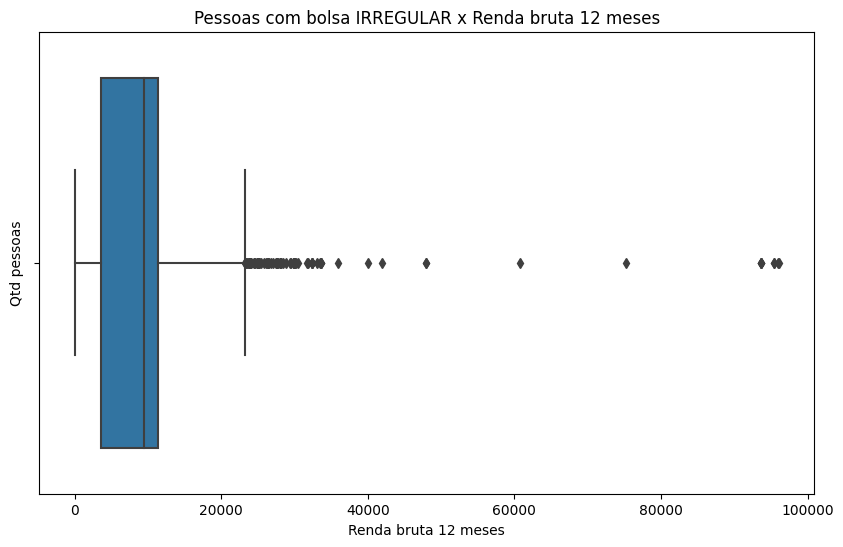

In [108]:
# Pessoas com bolsa x Renda média / 
bar = sns.boxplot(datapIRB['val_renda_bruta_12_meses_memb'])
bar.set(xlabel='Renda bruta 12 meses',ylabel='Qtd pessoas')
plt.title('Pessoas com bolsa IRREGULAR x Renda bruta 12 meses')


#### Pessoas Regulares

Nesses outros a seguir só temos pessoas regulares como é possivel observar , e verificar que grande parte delas possuem uma renda per capita em torno dos R$50 reais.

Text(0.5, 1.0, 'Pessoas com bolsa REGULAR x Renda média')

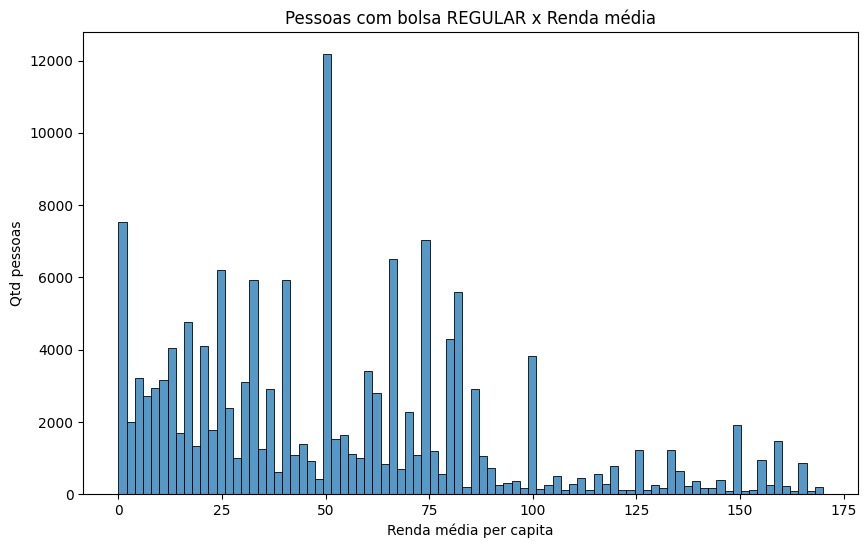

In [109]:
# Pessoas com bolsa x Renda média / 
bar = sns.histplot(datapRB['vlr_renda_media_fam'])
bar.set(xlabel='Renda média per capita',ylabel='Qtd pessoas')
plt.title('Pessoas com bolsa REGULAR x Renda média')

d:\Arquivos e progamas\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Pessoas com bolsa REGULAR x Renda média')

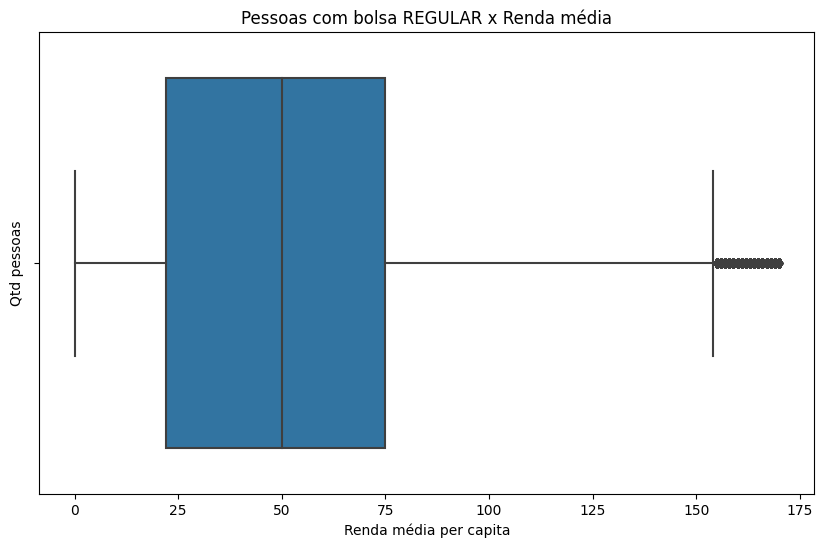

In [110]:
# Pessoas com bolsa x Renda média / 
bar = sns.boxplot(datapRB['vlr_renda_media_fam'])
bar.set(xlabel='Renda média per capita',ylabel='Qtd pessoas')
plt.title('Pessoas com bolsa REGULAR x Renda média')

d:\Arquivos e progamas\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Pessoas com bolsa REGULAR x Renda bruta 12 meses')

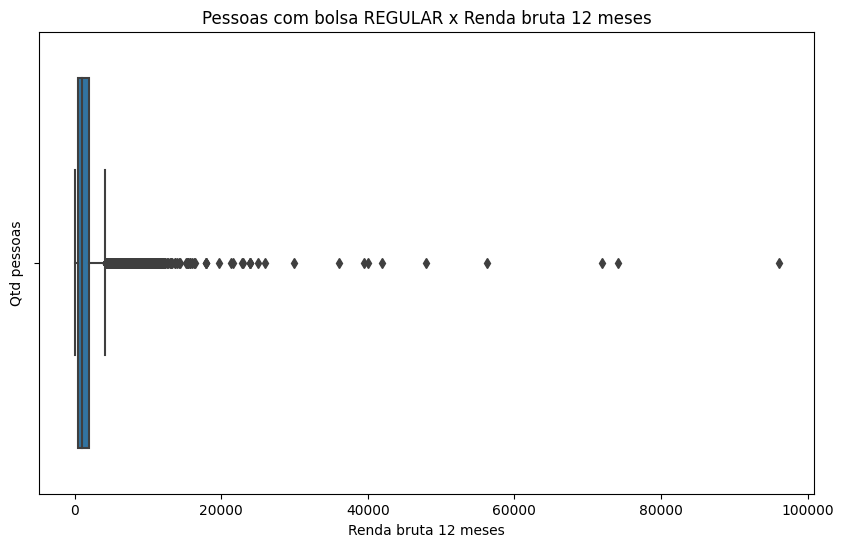

In [111]:
# Pessoas com bolsa x Renda média / 
bar = sns.boxplot(datapRB['val_renda_bruta_12_meses_memb'])
bar.set(xlabel='Renda bruta 12 meses',ylabel='Qtd pessoas')
plt.title('Pessoas com bolsa REGULAR x Renda bruta 12 meses')
